In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
import syllabenn_ranna_kw as syl
import codecs
import os
from collections import defaultdict


In [3]:
infiles = os.listdir("kernewek_corpus/kemmyn_prefstrip")
print(infiles)

['bmkk_stripped.txt', 'charfrag_kk_stripped.txt', 'cwkk_stripped.txt', 'mckk_stripped.txt', 'omkkks_stripped.txt', 'pckk_stripped.txt', 'rdkk_stripped.txt', 'skeulanyeth1_kw_kk.txt', 'solempnyta_kk.txt', 'tolkien_kk.txt', 'tregkk_stripped_removebrackets3_removecrossed.txt']


In [4]:
fnamestuple = enumerate(infiles)

In [5]:
Nf = -1
while (not(Nf in range(11))):
    try:
        print(list(fnamestuple))
        Nf = input("choose number between 0 and 10 to select file\n")
        Nf = int(Nf)
    except:
        print("should be integer betweeen 0-10")

[(0, 'bmkk_stripped.txt'), (1, 'charfrag_kk_stripped.txt'), (2, 'cwkk_stripped.txt'), (3, 'mckk_stripped.txt'), (4, 'omkkks_stripped.txt'), (5, 'pckk_stripped.txt'), (6, 'rdkk_stripped.txt'), (7, 'skeulanyeth1_kw_kk.txt'), (8, 'solempnyta_kk.txt'), (9, 'tolkien_kk.txt'), (10, 'tregkk_stripped_removebrackets3_removecrossed.txt')]
choose number between 0 and 10 to select file
2


In [6]:
infiles2 = [os.path.join("kernewek_corpus/kemmyn_prefstrip", f) for f in infiles]

In [7]:
# run the syllable segmentation program
# as the default, it will use reverse segmentation starting from the end of each word
# 2 versions of filename, one is just the file, the other is full path
infilename = infiles[Nf]
infilename2 = infiles2[Nf]

infile = codecs.open(infilename2, "r", encoding="utf-8", errors="replace")
inputtext = infile.read()
inputtext = syl.preprocess2ASCII(inputtext)
regexps = syl.kwKemmynRegExp
rannans = syl.RannaSyllabenn(inputtext)
counts = syl.CountAllSyls()
for i in rannans.geryow:
    g = syl.Ger(i,rannans, counts, fwds=False, regexps=regexps,
                    FSSmode=False,
                    CYmode=False, gwarnya=False)
#print(syl.totalcountsOutput(counts))

In [8]:
# running the above program will mean a variable counts is created which is a CountAllSyls object
# which contains a number of variables such as counts.NSylTotal
print("Total number of syllables in text = {NSyl}".format(NSyl=counts.NSylTotal))

Total number of syllables in text = 17604


In [9]:
# counts of differing types of syllable structure
print(counts.AllSyllablesStructDict)

defaultdict(<class 'int'>, {'V': 1989, 'CV': 6266, 'CVC': 7559, 'VC': 1790})


In [10]:
# counts by a tuple expressing whether a syllable is stressed, a monosyllable, structure,
# number of syllables the word it is found in, and whether the syllable is word-final
# tuple (stressed, monosyl, structure, nSylsGer, final)
# print(counts.AllSyllablesTupleDict)

In [11]:
# add labels to the tuple providing information about syllables
def outputTuple(t):
    labels = ("Stressed: ", "Monosyllable: ", "Structure: ", "nSylsGer: ", "Final: ")
    assert(len(labels)==len(t))
    outt = tuple(labels[i]+str(t[i]) for i, _ in enumerate(labels))
    return outt

In [12]:
def outputLabelShort(t):
    if t[0]:
        stress = "S"
    else:
        stress = "s"
    if t[1]:
        mono = "M"
    else:
        mono = "m"
    struct = t[2]
    nsyls = str(t[3])
    if t[4]:
        final = "F"
    else:
        final = "f"
    outlabel = stress + mono + struct + nsyls + final
    return outlabel

In [13]:
# create a new dictionary for the labelled information
# and copy over the counts
AllSyllablesTupleDictLabelled = defaultdict(int)
for t in counts.AllSyllablesTupleDict:
    #print(outputTuple(t))
    AllSyllablesTupleDictLabelled[outputTuple(t)] = counts.AllSyllablesTupleDict[t]

In [14]:
AllSyllablesTupleDictLabelled2 = defaultdict(int)
for t in counts.AllSyllablesTupleDict:
    AllSyllablesTupleDictLabelled2[outputLabelShort(t)] = counts.AllSyllablesTupleDict[t]

In [15]:
# sort the different syllable types by decreasing frequency
AllSyllablesTupleDkv = [(k,v) for (k,v) in AllSyllablesTupleDictLabelled.items()]
AllSyllablesTupleDSort = sorted(AllSyllablesTupleDkv,
                                  key=lambda AllSyllablesTupleDkv: AllSyllablesTupleDkv[1],
                                  reverse=True)
AllSyllablesTupleDkv2 = [(k,v) for (k,v) in AllSyllablesTupleDictLabelled2.items()]
AllSyllablesTupleDSort2 = sorted(AllSyllablesTupleDkv2,
                                  key=lambda AllSyllablesTupleDkv2: AllSyllablesTupleDkv2[1],
                                  reverse=True)

In [16]:
for i in AllSyllablesTupleDSort:
    print(i)

(('Stressed: True', 'Monosyllable: True', 'Structure: CVC', 'nSylsGer: 1', 'Final: True'), 3192)
(('Stressed: False', 'Monosyllable: False', 'Structure: CVC', 'nSylsGer: 2', 'Final: True'), 1964)
(('Stressed: True', 'Monosyllable: False', 'Structure: CV', 'nSylsGer: 2', 'Final: False'), 1557)
(('Stressed: False', 'Monosyllable: False', 'Structure: CV', 'nSylsGer: 2', 'Final: True'), 1332)
(('Stressed: True', 'Monosyllable: False', 'Structure: CVC', 'nSylsGer: 2', 'Final: False'), 1070)
(('Stressed: False', 'Monosyllable: True', 'Structure: CV', 'nSylsGer: 1', 'Final: True'), 1034)
(('Stressed: True', 'Monosyllable: True', 'Structure: CV', 'nSylsGer: 1', 'Final: True'), 1017)
(('Stressed: False', 'Monosyllable: True', 'Structure: V', 'nSylsGer: 1', 'Final: True'), 959)
(('Stressed: True', 'Monosyllable: True', 'Structure: VC', 'nSylsGer: 1', 'Final: True'), 941)
(('Stressed: True', 'Monosyllable: False', 'Structure: V', 'nSylsGer: 2', 'Final: False'), 495)
(('Stressed: False', 'Monosyll

In [17]:
for i in AllSyllablesTupleDSort2:
    print(i)

('SMCVC1F', 3192)
('smCVC2F', 1964)
('SmCV2f', 1557)
('smCV2F', 1332)
('SmCVC2f', 1070)
('sMCV1F', 1034)
('SMCV1F', 1017)
('sMV1F', 959)
('SMVC1F', 941)
('SmV2f', 495)
('sMCVC1F', 440)
('sMVC1F', 409)
('SmCV3f', 395)
('smCV3F', 337)
('smCV3f', 327)
('smCVC3F', 316)
('SMV1F', 270)
('SmCVC3f', 259)
('SmVC2f', 230)
('smCVC3f', 140)
('smV3f', 132)
('SmCVC2F', 103)
('smCV2f', 95)
('SmCV2F', 83)
('smVC3f', 78)
('smV2f', 71)
('smVC2F', 58)
('smCV4f', 37)
('SmCV4f', 36)
('smVC2f', 33)
('smCVC4f', 27)
('smCVC4F', 25)
('smV2F', 24)
('SmV3f', 16)
('smCVC2f', 14)
('smVC3F', 14)
('smVC4f', 13)
('smCV4F', 12)
('smV4f', 11)
('smV3F', 10)
('SmCVC4f', 8)
('SmVC3f', 7)
('smVC4F', 6)
('smCV5f', 2)
('smV4F', 1)
('SmVC2F', 1)
('smCVC5f', 1)
('SmCV5f', 1)
('smCV5F', 1)


Text(0.5, 1.0, 'Counts of syllable types in cwkk_stripped.txt')

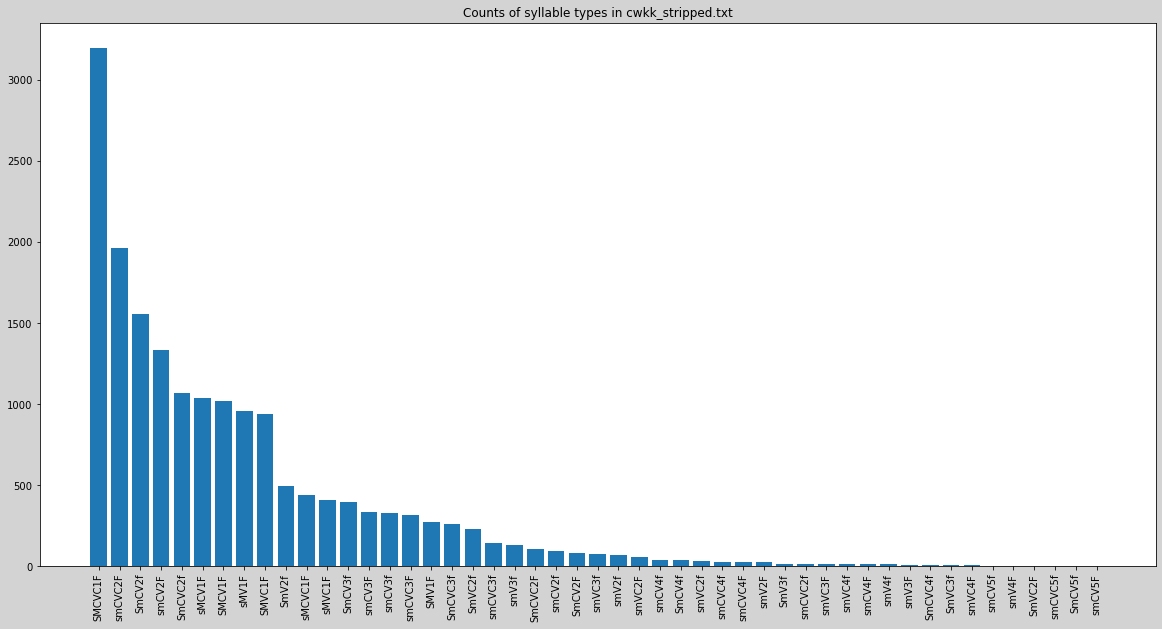

In [18]:
syltypes = [t[0] for t in AllSyllablesTupleDSort2]
syltypesN = [t[1] for t in AllSyllablesTupleDSort2]
# create a matplotlib figure
fig = plt.figure(figsize=[20,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(AllSyllablesTupleDSort2))

p1 = ax.bar(ind, syltypesN)
ax.set_xticks(ind)
ax.set_xticklabels(syltypes, rotation=90)
title = "Counts of syllable types in {f}".format(f=infilename)
ax.set_title(title)

In [19]:
AllSyllablesTupleDSort2_mono = [t for t in AllSyllablesTupleDSort2 if int(t[0][-2])==1]
sum_mono = sum([t[1] for t in AllSyllablesTupleDSort2_mono])

In [20]:
print(AllSyllablesTupleDSort2_mono)
print("total of {s} syllables in monosyllabic words".format(s=sum_mono))

[('SMCVC1F', 3192), ('sMCV1F', 1034), ('SMCV1F', 1017), ('sMV1F', 959), ('SMVC1F', 941), ('sMCVC1F', 440), ('sMVC1F', 409), ('SMV1F', 270)]
total of 8262 syllables in monosyllabic words


Text(0.5, 1.0, 'Counts of syllable types of monosyllabic words in cwkk_stripped.txt')

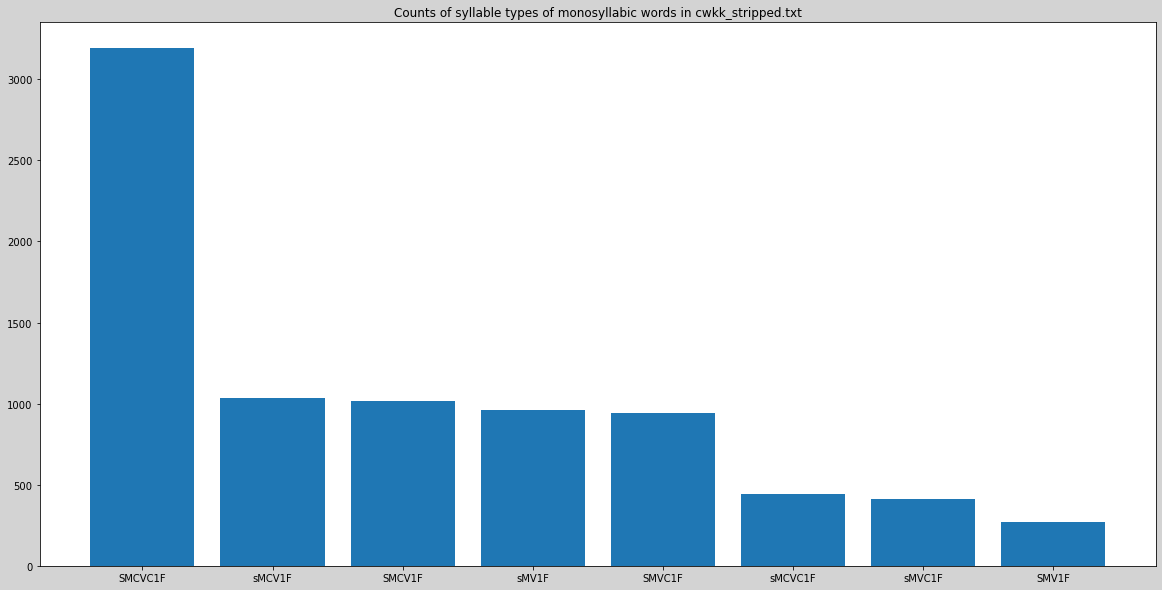

In [21]:
syltypes = [t[0] for t in AllSyllablesTupleDSort2_mono]
syltypesN = [t[1] for t in AllSyllablesTupleDSort2_mono]
fig = plt.figure(figsize=[20,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(AllSyllablesTupleDSort2_mono))
p1 = ax.bar(ind, syltypesN)
ax.set_xticks(ind)
ax.set_xticklabels(syltypes, rotation=0)
title = "Counts of syllable types of monosyllabic words in {f}".format(f=infilename)
ax.set_title(title)

In [22]:
AllSyllablesTupleDSort2_disyl = [t for t in AllSyllablesTupleDSort2 if int(t[0][-2])==2]
sum_disyl = sum([t[1] for t in AllSyllablesTupleDSort2_disyl])
AllSyllablesTupleDSort2_trisyl = [t for t in AllSyllablesTupleDSort2 if int(t[0][-2])==3]
sum_trisyl = sum([t[1] for t in AllSyllablesTupleDSort2_trisyl])
AllSyllablesTupleDSort2_quadsyl = [t for t in AllSyllablesTupleDSort2 if int(t[0][-2])==4]
sum_quad = sum([t[1] for t in AllSyllablesTupleDSort2_quadsyl])
AllSyllablesTupleDSort2_5moresyl = [t for t in AllSyllablesTupleDSort2 if int(t[0][-2])>=5]
sum_5more = sum([t[1] for t in AllSyllablesTupleDSort2_5moresyl])

In [23]:
print(AllSyllablesTupleDSort2_disyl)
print("total of {s} syllables in disyllabic words".format(s=sum_disyl))

[('smCVC2F', 1964), ('SmCV2f', 1557), ('smCV2F', 1332), ('SmCVC2f', 1070), ('SmV2f', 495), ('SmVC2f', 230), ('SmCVC2F', 103), ('smCV2f', 95), ('SmCV2F', 83), ('smV2f', 71), ('smVC2F', 58), ('smVC2f', 33), ('smV2F', 24), ('smCVC2f', 14), ('SmVC2F', 1)]
total of 7130 syllables in disyllabic words


Text(0.5, 1.0, 'Counts of syllable types of disyllabic words in cwkk_stripped.txt')

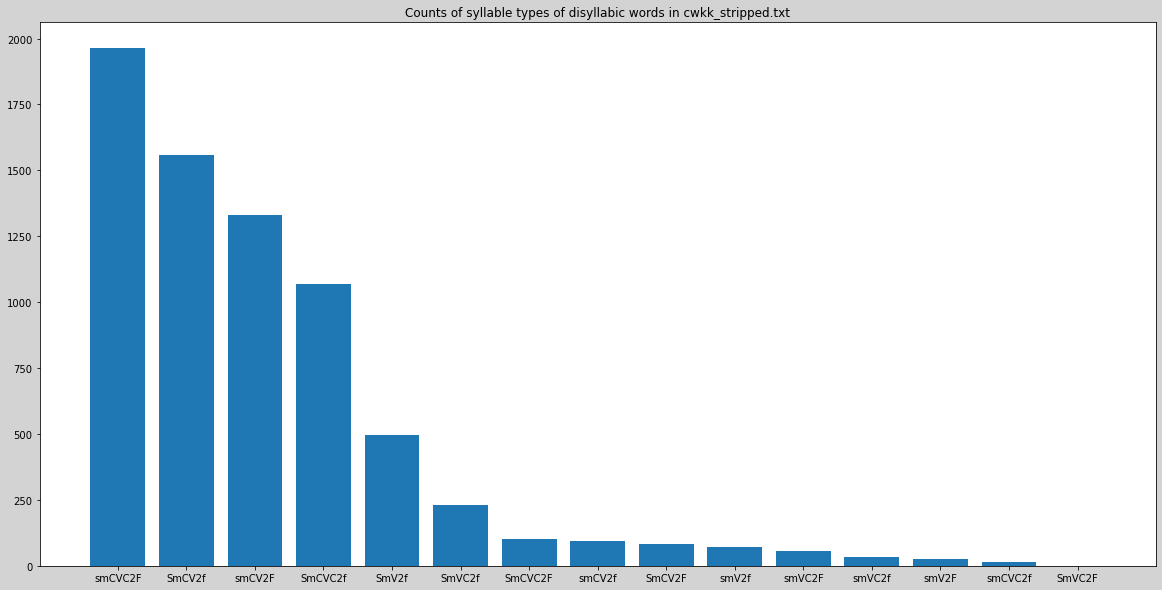

In [24]:
syltypes = [t[0] for t in AllSyllablesTupleDSort2_disyl]
syltypesN = [t[1] for t in AllSyllablesTupleDSort2_disyl]
fig = plt.figure(figsize=[20,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(AllSyllablesTupleDSort2_disyl))
p1 = ax.bar(ind, syltypesN)
ax.set_xticks(ind)
ax.set_xticklabels(syltypes, rotation=0)
title = "Counts of syllable types of disyllabic words in {f}".format(f=infilename)
ax.set_title(title)

In [25]:
print(AllSyllablesTupleDSort2_trisyl)
print("total of {s} syllables in trisyllabic words".format(s=sum_trisyl))

[('SmCV3f', 395), ('smCV3F', 337), ('smCV3f', 327), ('smCVC3F', 316), ('SmCVC3f', 259), ('smCVC3f', 140), ('smV3f', 132), ('smVC3f', 78), ('SmV3f', 16), ('smVC3F', 14), ('smV3F', 10), ('SmVC3f', 7)]
total of 2031 syllables in trisyllabic words


Text(0.5, 1.0, 'Counts of syllable types of trisyllabic words in cwkk_stripped.txt')

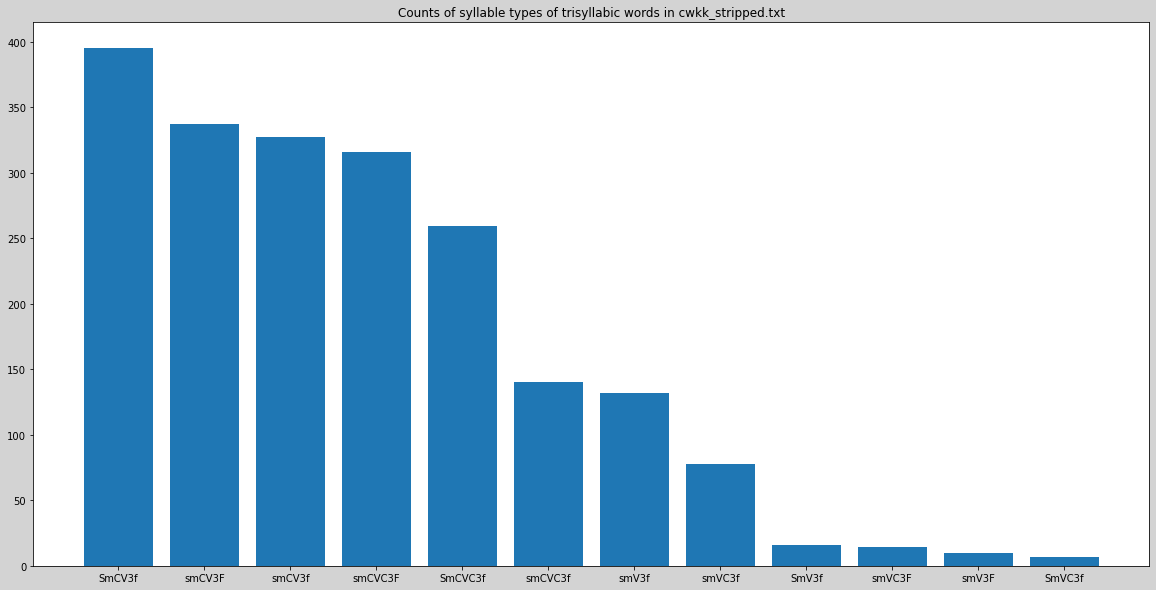

In [26]:
syltypes = [t[0] for t in AllSyllablesTupleDSort2_trisyl]
syltypesN = [t[1] for t in AllSyllablesTupleDSort2_trisyl]
fig = plt.figure(figsize=[20,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(AllSyllablesTupleDSort2_trisyl))
p1 = ax.bar(ind, syltypesN)
ax.set_xticks(ind)
ax.set_xticklabels(syltypes, rotation=0)
title = "Counts of syllable types of trisyllabic words in {f}".format(f=infilename)
ax.set_title(title)

In [27]:
print(AllSyllablesTupleDSort2_quadsyl)
print("total of {s} syllables in quadrisyllabic words".format(s=sum_quad))

[('smCV4f', 37), ('SmCV4f', 36), ('smCVC4f', 27), ('smCVC4F', 25), ('smVC4f', 13), ('smCV4F', 12), ('smV4f', 11), ('SmCVC4f', 8), ('smVC4F', 6), ('smV4F', 1)]
total of 176 syllables in quadrisyllabic words


Text(0.5, 1.0, 'Counts of syllable types of quadrisyllabic words in cwkk_stripped.txt')

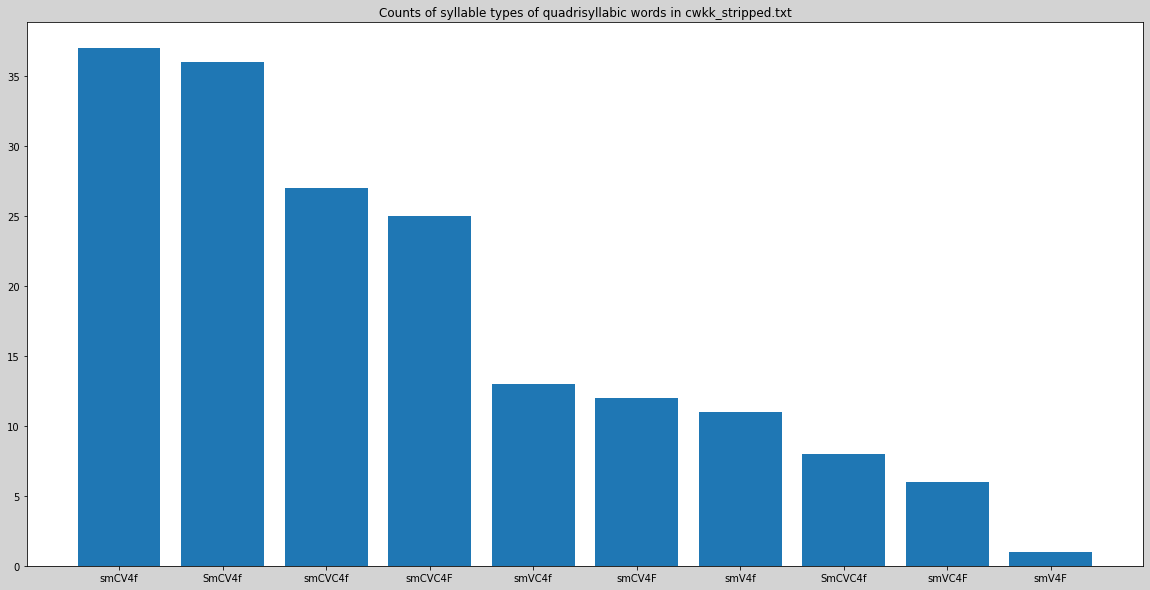

In [28]:
syltypes = [t[0] for t in AllSyllablesTupleDSort2_quadsyl]
syltypesN = [t[1] for t in AllSyllablesTupleDSort2_quadsyl]
fig = plt.figure(figsize=[20,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(AllSyllablesTupleDSort2_quadsyl))
p1 = ax.bar(ind, syltypesN)
ax.set_xticks(ind)
ax.set_xticklabels(syltypes, rotation=0)
title = "Counts of syllable types of quadrisyllabic words in {f}".format(f=infilename)
ax.set_title(title)

In [29]:
print(AllSyllablesTupleDSort2_5moresyl)
print("total of {s} syllables in words of 5 or more syllables".format(s=sum_5more))

[('smCV5f', 2), ('smCVC5f', 1), ('SmCV5f', 1), ('smCV5F', 1)]
total of 5 syllables in words of 5 or more syllables


In [30]:
# get the dictionary of syllables and their frequencies out of the CountAllSyls object
# and use the function to remove any punctuation characters
AllSyllablesDict_nopunct = counts.remove_punctchars(counts.AllSyllablesDict)

In [31]:
#make it into a list of tuples
AllSyllablesDictkv = [(k,v) for (k,v) in AllSyllablesDict_nopunct.items()]

In [32]:
# sort the syllables alphabetically
counts.AllSyllablesAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0], reverse=False)

In [33]:
print("All syllables found in text, with frequencies")
print(counts.AllSyllablesAlphaSort)

All syllables found in text, with frequencies
[('a', 940), ('aj', 8), ('al', 8), ('am', 26), ('an', 396), ('and', 4), ('ans', 10), ('ar', 29), ('art', 1), ('as', 21), ('ash', 1), ('at', 1), ('ath', 23), ('av', 1), ('aw', 1), ('ay', 4), ('ayr', 1), ('ba', 19), ('bad', 1), ('ban', 15), ('bann', 9), ('bar', 5), ('bart', 1), ('barth', 24), ('bass', 1), ('bay', 5), ('bayn', 5), ('be', 43), ('bedh', 1), ('begh', 1), ('bel', 36), ('bell', 1), ('ben', 5), ('benn', 3), ('ber', 19), ('bern', 1), ('berth', 5), ('bes', 8), ('best', 12), ('beu', 6), ('beun', 1), ('beus', 11), ('bew', 4), ('bewgh', 1), ('bi', 5), ('biw', 1), ('blam', 2), ('blans', 4), ('blas', 2), ('blash', 4), ('blayn', 1), ('ble', 1), ('bleg', 3), ('blen', 1), ('blew', 3), ('bleydh', 1), ('bloedh', 1), ('blos', 1), ('bly', 2), ('blys', 1), ('bo', 39), ('bodh', 13), ('boek', 2), ('boel', 1), ('boes', 2), ('bor', 3), ('born', 1), ('borth', 4), ('bos', 37), ('bra', 3), ('bramm', 2), ('bran', 1), ('branch', 1), ('bras', 46), ('bratt',

In [34]:
print("Total number of different syllables = {t}".format(t=len(counts.AllSyllablesAlphaSort)))

Total number of different syllables = 1440


In [35]:
counts.keyvaltups()
topN = 20
print("Top {n} syllables = {s}".format(n=topN,s=counts.AllSyllablesDSort[:topN]))

Top 20 syllables = [('a', 940), ('yn', 405), ('an', 396), ('na', 375), ('ma', 323), ('ha', 298), ('my', 257), ('y', 242), ('ow', 235), ('dhe', 225), ('yw', 205), ('dha', 164), ('e', 162), ('ny', 146), ('hen', 137), ('ya', 130), ('yth', 124), ('rag', 112), ('ty', 108), ('bys', 107)]


In [36]:
# punctuation characters are now removed

In [37]:
len([t for t in counts.AllSyllablesAlphaSort if "'" in t[0]])

0

In [38]:
len([t for t in counts.AllSyllablesAlphaSort if "-" in t[0]])

0

In [39]:
len([t for t in counts.AllSyllablesAlphaSort if '"' in t[0]])

0

In [40]:
# count up how many syllables start with each letter of the alphabet

In [41]:
# q, x not used in Kernewek Kemmyn
# z only for a few loan words, and c only in digraph ch but haven't made assumption here

In [42]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"

In [43]:
sylls_letter = defaultdict(list)
totalsyls_letter = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables starting with the letter
        sylls_letter[i].append(t)
    # list the syllables starting with the letter
    print("Syllables starting with {L}".format(L=i))
    print(sylls_letter[i])
    # fill the totalsyls_letter dictionary
    # with the sum of the frequencies of all syllables
    # starting with each letter
    total_starting_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_starting_letter))
    totalsyls_letter[i] = total_starting_letter

Syllables starting with a
[('a', 940), ('aj', 8), ('al', 8), ('am', 26), ('an', 396), ('and', 4), ('ans', 10), ('ar', 29), ('art', 1), ('as', 21), ('ash', 1), ('at', 1), ('ath', 23), ('av', 1), ('aw', 1), ('ay', 4), ('ayr', 1)]
total number = 1475
Syllables starting with b
[('ba', 19), ('bad', 1), ('ban', 15), ('bann', 9), ('bar', 5), ('bart', 1), ('barth', 24), ('bass', 1), ('bay', 5), ('bayn', 5), ('be', 43), ('bedh', 1), ('begh', 1), ('bel', 36), ('bell', 1), ('ben', 5), ('benn', 3), ('ber', 19), ('bern', 1), ('berth', 5), ('bes', 8), ('best', 12), ('beu', 6), ('beun', 1), ('beus', 11), ('bew', 4), ('bewgh', 1), ('bi', 5), ('biw', 1), ('blam', 2), ('blans', 4), ('blas', 2), ('blash', 4), ('blayn', 1), ('ble', 1), ('bleg', 3), ('blen', 1), ('blew', 3), ('bleydh', 1), ('bloedh', 1), ('blos', 1), ('bly', 2), ('blys', 1), ('bo', 39), ('bodh', 13), ('boek', 2), ('boel', 1), ('boes', 2), ('bor', 3), ('born', 1), ('borth', 4), ('bos', 37), ('bra', 3), ('bramm', 2), ('bran', 1), ('branch', 

Syllables starting with s
[('sa', 68), ('sal', 6), ('sam', 1), ('sans', 2), ('sav', 12), ('saw', 24), ('say', 2), ('se', 27), ('sedh', 3), ('sek', 4), ('sel', 8), ('sem', 7), ('sen', 17), ('senn', 9), ('sens', 2), ('sent', 2), ('ser', 52), ('sern', 1), ('serv', 6), ('ses', 12), ('set', 1), ('seth', 13), ('sett', 11), ('seul', 1), ('sew', 3), ('sewgh', 5), ('seyth', 7), ('sha', 1), ('shalt', 1), ('sham', 1), ('shap', 3), ('she', 1), ('shes', 5), ('showr', 2), ('shy', 4), ('shyf', 1), ('shys', 1), ('si', 51), ('sight', 1), ('sin', 1), ('sir', 3), ('sis', 5), ('siw', 1), ('ska', 3), ('skans', 2), ('skant', 1), ('skap', 1), ('skas', 1), ('skav', 1), ('ske', 9), ('skern', 1), ('skes', 4), ('skev', 2), ('ski', 15), ('skis', 13), ('skoell', 1), ('skon', 7), ('skor', 1), ('skorr', 1), ('skri', 3), ('sku', 1), ('skwat', 3), ('skwe', 2), ('skwedh', 1), ('skweyth', 2), ('skwith', 3), ('skyn', 6), ('skynn', 1), ('skys', 6), ('slak', 1), ('slim', 2), ('slo', 2), ('slow', 6), ('slynk', 2), ('sment',

In [44]:
print("Total syllables starting with each letter of the alphabet:\n{T}".format(T=totalsyls_letter))

Total syllables starting with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 1475, 'b': 681, 'c': 42, 'd': 1999, 'e': 434, 'f': 342, 'g': 965, 'h': 988, 'i': 62, 'j': 113, 'k': 609, 'l': 745, 'm': 1243, 'n': 1195, 'o': 719, 'p': 695, 'q': 0, 'r': 551, 's': 884, 't': 869, 'u': 76, 'v': 964, 'w': 667, 'x': 0, 'y': 1286, 'z': 0})


In [45]:
# repeat the process for two letter combinations starting the syllable
sylls_2letter = defaultdict(list)
totalsyls_2letter = defaultdict(int)
# this time, assume no q, x, z
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [46]:
# use a nested loop for the two letter combinations
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .startswith rather than == to avoid error with single character syllables
        letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0:2].startswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv:
            sylls_2letter[twoletters].append(t)
        if len(letter_dictkv) > 0:
            print("Syllables starting with {L}".format(L=twoletters))
            print(sylls_2letter[twoletters])
            total_starting_2letter = sum(t[1] for t in letter_dictkv)
            totalsyls_2letter[twoletters] = total_starting_2letter

Syllables starting with aj
[('aj', 8)]
Syllables starting with al
[('al', 8)]
Syllables starting with am
[('am', 26)]
Syllables starting with an
[('an', 396), ('and', 4), ('ans', 10)]
Syllables starting with ar
[('ar', 29), ('art', 1)]
Syllables starting with as
[('as', 21), ('ash', 1)]
Syllables starting with at
[('at', 1), ('ath', 23)]
Syllables starting with av
[('av', 1)]
Syllables starting with aw
[('aw', 1)]
Syllables starting with ay
[('ay', 4), ('ayr', 1)]
Syllables starting with ba
[('ba', 19), ('bad', 1), ('ban', 15), ('bann', 9), ('bar', 5), ('bart', 1), ('barth', 24), ('bass', 1), ('bay', 5), ('bayn', 5)]
Syllables starting with be
[('be', 43), ('bedh', 1), ('begh', 1), ('bel', 36), ('bell', 1), ('ben', 5), ('benn', 3), ('ber', 19), ('bern', 1), ('berth', 5), ('bes', 8), ('best', 12), ('beu', 6), ('beun', 1), ('beus', 11), ('bew', 4), ('bewgh', 1)]
Syllables starting with bi
[('bi', 5), ('biw', 1)]
Syllables starting with bl
[('blam', 2), ('blans', 4), ('blas', 2), ('blash'

In [47]:
print("Total syllables starting with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter))
print("Total number of different 2 letter combinations that start syllables = {N2}".format(N2=len(totalsyls_2letter)))

Total syllables starting with each two letters of the alphabet:
defaultdict(<class 'int'>, {'aj': 8, 'al': 8, 'am': 26, 'an': 410, 'ar': 30, 'as': 22, 'at': 24, 'av': 1, 'aw': 1, 'ay': 5, 'ba': 85, 'be': 158, 'bi': 6, 'bl': 27, 'bo': 102, 'br': 100, 'bu': 27, 'by': 176, 'ca': 1, 'ce': 2, 'ch': 38, 'co': 1, 'da': 139, 'de': 343, 'dh': 1072, 'di': 73, 'dl': 3, 'do': 99, 'dr': 145, 'du': 13, 'dy': 112, 'ed': 4, 'ek': 7, 'el': 15, 'em': 8, 'en': 12, 'er': 25, 'es': 47, 'et': 6, 'eu': 78, 'ev': 61, 'ew': 5, 'ey': 4, 'fa': 56, 'fe': 73, 'fi': 20, 'fl': 28, 'fo': 55, 'fr': 54, 'fu': 12, 'fy': 44, 'ga': 236, 'ge': 137, 'gg': 1, 'gh': 71, 'gi': 14, 'gl': 30, 'go': 146, 'gr': 49, 'gu': 30, 'gw': 214, 'gy': 37, 'ha': 499, 'he': 258, 'hi': 27, 'ho': 46, 'hu': 4, 'hw': 144, 'hy': 10, 'in': 3, 'is': 2, 'it': 1, 'ja': 14, 'je': 20, 'ji': 9, 'jo': 29, 'ju': 1, 'jy': 40, 'ka': 101, 'ke': 171, 'ki': 17, 'kl': 22, 'kn': 1, 'ko': 137, 'kr': 62, 'ku': 12, 'kw': 35, 'ky': 51, 'la': 123, 'le': 228, 'li': 36,

In [48]:
# convert the defaultdict into a list of tuples
syls_2letter = [t for t in totalsyls_2letter]

In [49]:
# list of integers of the frequencies
syls_2letterN = [totalsyls_2letter[t] for t in totalsyls_2letter]
print(syls_2letterN)

[8, 8, 26, 410, 30, 22, 24, 1, 1, 5, 85, 158, 6, 27, 102, 100, 27, 176, 1, 2, 38, 1, 139, 343, 1072, 73, 3, 99, 145, 13, 112, 4, 7, 15, 8, 12, 25, 47, 6, 78, 61, 5, 4, 56, 73, 20, 28, 55, 54, 12, 44, 236, 137, 1, 71, 14, 30, 146, 49, 30, 214, 37, 499, 258, 27, 46, 4, 144, 10, 3, 2, 1, 14, 20, 9, 29, 1, 40, 101, 171, 17, 22, 1, 137, 62, 12, 35, 51, 123, 228, 36, 207, 107, 13, 31, 525, 142, 38, 150, 12, 376, 501, 256, 51, 116, 271, 4, 5, 2, 3, 73, 80, 16, 1, 76, 26, 22, 11, 40, 245, 15, 134, 61, 1, 12, 52, 75, 117, 185, 58, 250, 134, 52, 53, 1, 61, 115, 191, 20, 62, 91, 13, 2, 1, 122, 45, 104, 65, 4, 49, 208, 133, 147, 25, 5, 52, 117, 8, 19, 155, 6, 31, 1, 4, 157, 176, 40, 9, 127, 116, 9, 1, 329, 143, 153, 30, 16, 145, 121, 10, 49, 170, 42, 15, 1, 413, 55, 11, 124, 6, 205, 2]


Text(0.5, 1.0, 'Counts of initial two letters of all syllables in cwkk_stripped.txt')

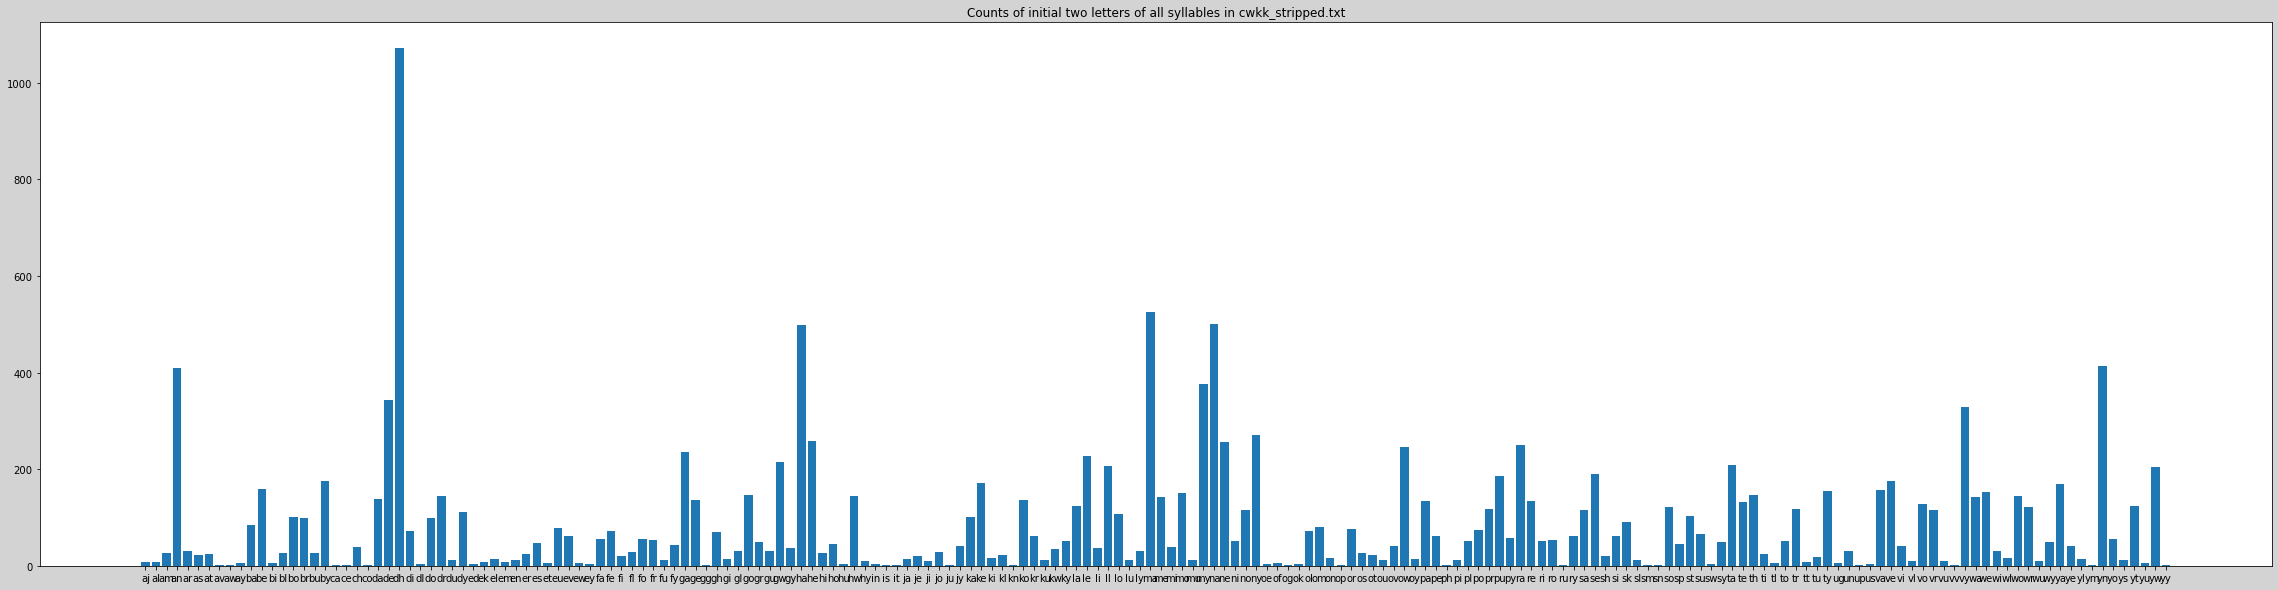

In [50]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter))
p1 = ax.bar(ind, syls_2letterN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter)
title = "Counts of initial two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [51]:
# create a 2D histogram of the frequencies
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter[twoletters])

In [52]:
#print(hist2d)

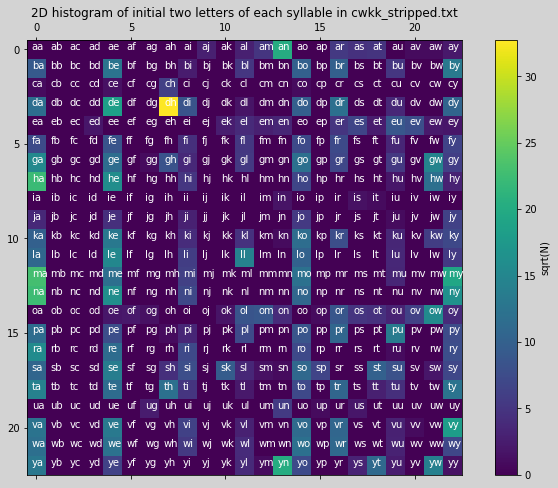

In [53]:
fig = plt.figure(figsize=[12,8], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of initial two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")

In [54]:
# sort by the end letter of the syllable
counts.AllSyllablesRevAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0][-1], reverse=False)

In [55]:
print("All syllables found in text, with frequencies, sorted by final letter")
print(counts.AllSyllablesRevAlphaSort)

All syllables found in text, with frequencies, sorted by final letter
[('pha', 1), ('ga', 93), ('da', 48), ('na', 375), ('va', 81), ('ma', 323), ('a', 940), ('ya', 130), ('ha', 298), ('tra', 38), ('dha', 164), ('ska', 3), ('ta', 92), ('vra', 35), ('sa', 68), ('lla', 52), ('ra', 69), ('wra', 48), ('ttha', 6), ('pa', 34), ('gha', 5), ('bra', 3), ('tha', 39), ('dra', 28), ('swa', 1), ('fa', 19), ('gwra', 11), ('ka', 36), ('sta', 18), ('la', 85), ('hwa', 4), ('wa', 30), ('cha', 7), ('ba', 19), ('kra', 3), ('tla', 3), ('pra', 8), ('stra', 2), ('sha', 1), ('gra', 1), ('ggha', 1), ('gwa', 6), ('dla', 2), ('kwra', 1), ('hwra', 2), ('ja', 4), ('pla', 2), ('wla', 3), ('vva', 1), ('sna', 1), ('heb', 53), ('mab', 34), ('sub', 2), ('pub', 73), ('neb', 40), ('bub', 17), ('ryb', 1), ('peub', 5), ('vab', 4), ('veb', 1), ('mond', 4), ('kond', 2), ('lawd', 1), ('vold', 1), ('told', 1), ('mad', 1), ('glad', 1), ('and', 4), ('voyd', 7), ('lord', 1), ('god', 2), ('ord', 1), ('rid', 1), ('led', 4), ('bad', 

In [56]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"
sylls_letter_end = defaultdict(list)
totalsyls_letter_end = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][-1].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables ending with the letter
        sylls_letter_end[i].append(t)
    # list the syllables ending with the letter
    print("Syllables ending with {L}".format(L=i))
    print(sylls_letter_end[i])
    # fill the totalsyls_letter_end dictionary
    # with the sum of the frequencies of all syllables
    # ending with each letter
    total_ending_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_ending_letter))
    totalsyls_letter_end[i] = total_ending_letter

Syllables ending with a
[('a', 940), ('ba', 19), ('bra', 3), ('cha', 7), ('da', 48), ('dha', 164), ('dla', 2), ('dra', 28), ('fa', 19), ('ga', 93), ('ggha', 1), ('gha', 5), ('gra', 1), ('gwa', 6), ('gwra', 11), ('ha', 298), ('hwa', 4), ('hwra', 2), ('ja', 4), ('ka', 36), ('kra', 3), ('kwra', 1), ('la', 85), ('lla', 52), ('ma', 323), ('na', 375), ('pa', 34), ('pha', 1), ('pla', 2), ('pra', 8), ('ra', 69), ('sa', 68), ('sha', 1), ('ska', 3), ('sna', 1), ('sta', 18), ('stra', 2), ('swa', 1), ('ta', 92), ('tha', 39), ('tla', 3), ('tra', 38), ('ttha', 6), ('va', 81), ('vra', 35), ('vva', 1), ('wa', 30), ('wla', 3), ('wra', 48), ('ya', 130)]
total number = 3244
Syllables ending with b
[('bub', 17), ('heb', 53), ('mab', 34), ('neb', 40), ('peub', 5), ('pub', 73), ('ryb', 1), ('sub', 2), ('vab', 4), ('veb', 1)]
total number = 230
Syllables ending with c
[]
total number = 0
Syllables ending with d
[('and', 4), ('bad', 1), ('byld', 1), ('fend', 1), ('glad', 1), ('god', 2), ('kond', 2), ('kord', 

In [57]:
print("Total syllables ending with each letter of the alphabet:\n{T}".format(T=totalsyls_letter_end))

Total syllables ending with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 3244, 'b': 230, 'c': 0, 'd': 41, 'e': 1362, 'f': 58, 'g': 341, 'h': 938, 'i': 707, 'j': 27, 'k': 139, 'l': 596, 'm': 580, 'n': 2181, 'o': 669, 'p': 47, 'q': 0, 'r': 1281, 's': 2234, 't': 288, 'u': 201, 'v': 368, 'w': 860, 'x': 0, 'y': 1212, 'z': 0})


In [58]:
# count up how many syllables end with each letter of the alphabet
sylls_2letter_end = defaultdict(list)
totalsyls_2letter_end = defaultdict(int)
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [59]:
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .endswith rather than == to avoid error with single character syllables
        letter_dictkv_end = [t for t in counts.AllSyllablesRevAlphaSort if t[0][-2:].endswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv_end:
            sylls_2letter_end[twoletters].append(t)
        if len(letter_dictkv_end) > 0:
            print("Syllables ending with {L}".format(L=twoletters))
            print(sylls_2letter_end[twoletters])
            total_ending_2letter = sum(t[1] for t in letter_dictkv_end)
            totalsyls_2letter_end[twoletters] = total_ending_2letter

Syllables ending with ab
[('mab', 34), ('vab', 4)]
Syllables ending with ad
[('mad', 1), ('glad', 1), ('bad', 1)]
Syllables ending with ag
[('rag', 112), ('hag', 85), ('nag', 14), ('prag', 14), ('gwag', 1), ('plag', 6)]
Syllables ending with aj
[('aj', 8), ('maj', 1)]
Syllables ending with ak
[('rak', 32), ('hak', 3), ('lak', 3), ('slak', 1)]
Syllables ending with al
[('al', 8), ('ghal', 4), ('sal', 6), ('val', 26), ('dal', 9), ('fal', 3), ('hal', 1), ('kwal', 2), ('tal', 2), ('mal', 4), ('nal', 1), ('kal', 1), ('thal', 2), ('yal', 1)]
Syllables ending with am
[('am', 26), ('vlam', 4), ('sam', 1), ('ham', 2), ('nam', 3), ('dam', 49), ('sham', 1), ('blam', 2), ('gam', 1), ('mam', 1), ('jam', 1), ('ram', 1)]
Syllables ending with an
[('an', 396), ('tan', 27), ('han', 47), ('kan', 7), ('nan', 24), ('pan', 45), ('ran', 5), ('ban', 15), ('ghan', 7), ('lan', 3), ('splan', 4), ('gan', 38), ('wan', 5), ('man', 6), ('kwan', 1), ('fan', 5), ('dan', 5), ('glan', 2), ('gwan', 1), ('van', 2), ('hwa

In [60]:
print("Total syllables ending with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter_end))
print("Total number of different 2 letter combinations that end syllables = {N2}".format(N2=len(totalsyls_2letter_end)))

Total syllables ending with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ab': 38, 'ad': 3, 'ag': 232, 'aj': 9, 'ak': 39, 'al': 70, 'am': 92, 'an': 650, 'ap': 4, 'ar': 267, 'as': 412, 'at': 18, 'av': 106, 'aw': 61, 'ay': 85, 'ba': 19, 'be': 43, 'bi': 5, 'bo': 39, 'bu': 3, 'by': 19, 'ce': 2, 'ch': 6, 'co': 1, 'da': 48, 'de': 96, 'dh': 335, 'di': 65, 'do': 3, 'dr': 7, 'du': 7, 'dy': 10, 'eb': 94, 'ed': 5, 'ef': 30, 'eg': 52, 'ek': 38, 'el': 192, 'em': 170, 'en': 413, 'ep': 4, 'er': 426, 'es': 389, 'et': 9, 'eu': 37, 'ev': 157, 'ew': 35, 'ey': 5, 'fa': 19, 'fe': 12, 'fi': 13, 'fo': 17, 'fy': 8, 'ga': 93, 'ge': 70, 'gh': 103, 'gi': 3, 'go': 44, 'gu': 11, 'gy': 4, 'ha': 522, 'he': 257, 'hi': 89, 'ho': 83, 'ht': 7, 'hu': 4, 'hy': 48, 'id': 1, 'ig': 12, 'ij': 1, 'ik': 6, 'il': 10, 'im': 2, 'in': 23, 'ir': 51, 'is': 131, 'it': 6, 'iv': 21, 'iw': 12, 'ja': 4, 'je': 6, 'ji': 9, 'jo': 2, 'jy': 35, 'ka': 39, 'ke': 57, 'ki': 24, 'kk': 10, 'ko': 23, 'ku': 8, 'ky': 3, 'la': 147, 'ld'

In [61]:
# convert the defaultdict into a list of tuples
syls_2letter_end = [t for t in totalsyls_2letter_end]
# list of integers of the frequencies
syls_2letter_endN = [totalsyls_2letter_end[t] for t in totalsyls_2letter_end]
print(syls_2letter_endN)

[38, 3, 232, 9, 39, 70, 92, 650, 4, 267, 412, 18, 106, 61, 85, 19, 43, 5, 39, 3, 19, 2, 6, 1, 48, 96, 335, 65, 3, 7, 7, 10, 94, 5, 30, 52, 38, 192, 170, 413, 4, 426, 389, 9, 37, 157, 35, 5, 19, 12, 13, 17, 8, 93, 70, 103, 3, 44, 11, 4, 522, 257, 89, 83, 7, 4, 48, 1, 12, 1, 6, 10, 2, 23, 51, 131, 6, 21, 12, 4, 6, 9, 2, 35, 39, 57, 24, 10, 23, 8, 3, 147, 3, 119, 40, 2, 204, 39, 5, 1, 14, 22, 323, 25, 22, 101, 79, 18, 8, 257, 376, 16, 75, 47, 5, 3, 286, 35, 261, 49, 146, 2, 47, 8, 20, 13, 16, 103, 113, 5, 205, 188, 28, 17, 63, 435, 54, 34, 22, 5, 28, 4, 4, 29, 249, 3, 152, 8, 153, 10, 8, 8, 6, 42, 48, 17, 13, 10, 28, 6, 16, 68, 27, 17, 51, 10, 52, 17, 60, 8, 6, 110, 44, 477, 16, 8, 25, 12, 109, 97, 21, 5, 28, 2, 21, 7, 251, 122, 68, 2, 82, 47, 26, 44, 1, 88, 41, 1, 97, 83, 25, 15, 22, 28, 9, 5, 26, 130, 1, 7, 2, 12, 4, 2, 5, 43, 104, 618, 2, 5, 29, 687, 7, 13, 317]


Text(0.5, 1.0, 'Counts of final two letters of all syllables in cwkk_stripped.txt')

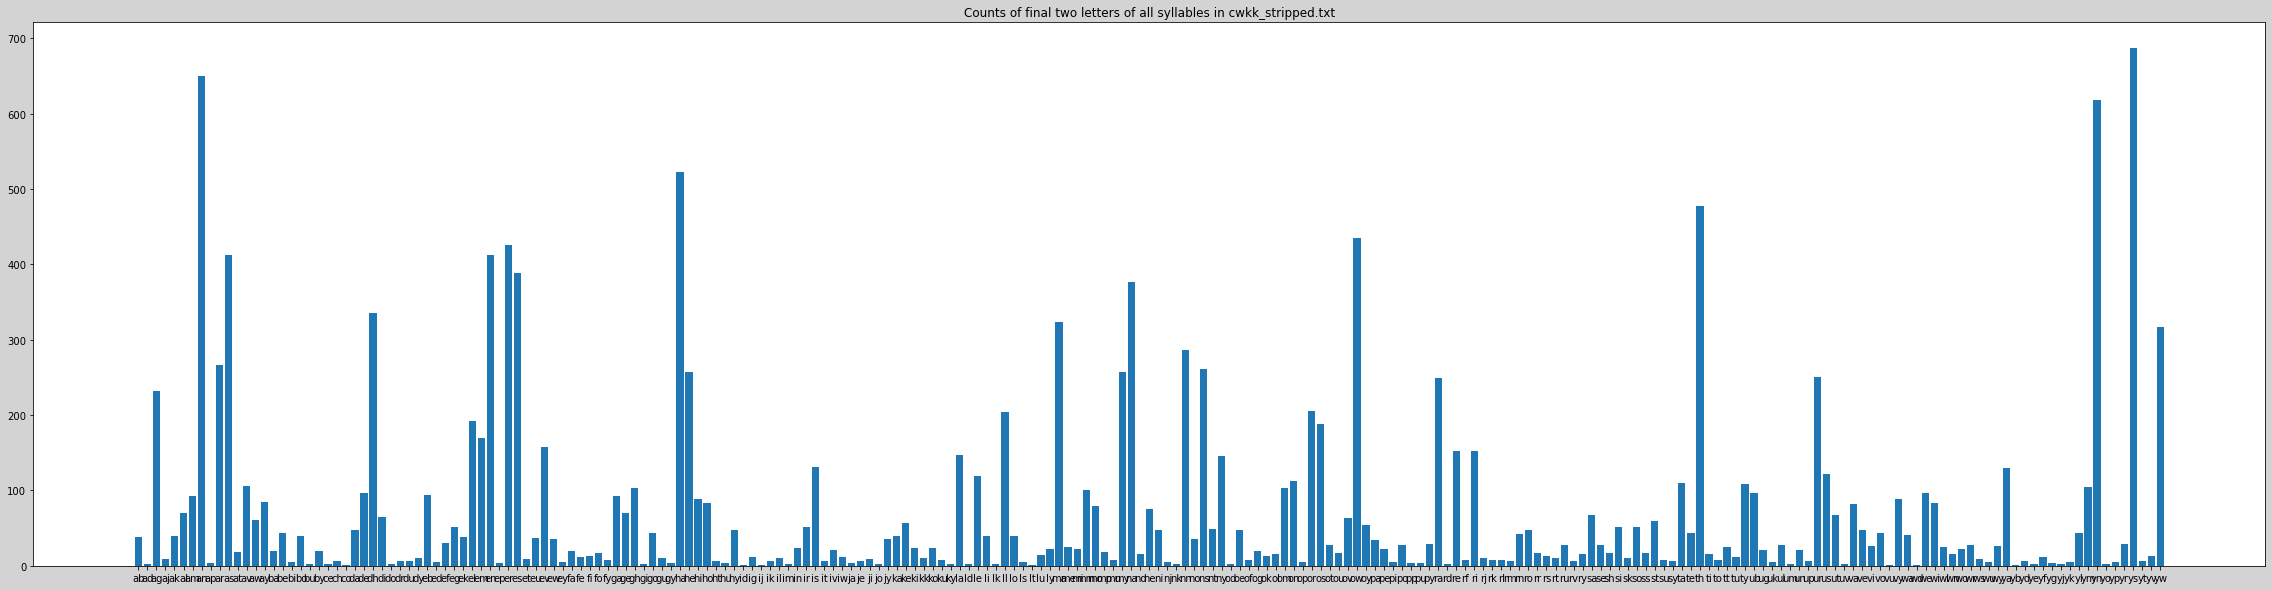

In [62]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter_end))
p1 = ax.bar(ind, syls_2letter_endN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter_end)
title = "Counts of final two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [63]:
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter_end[twoletters])

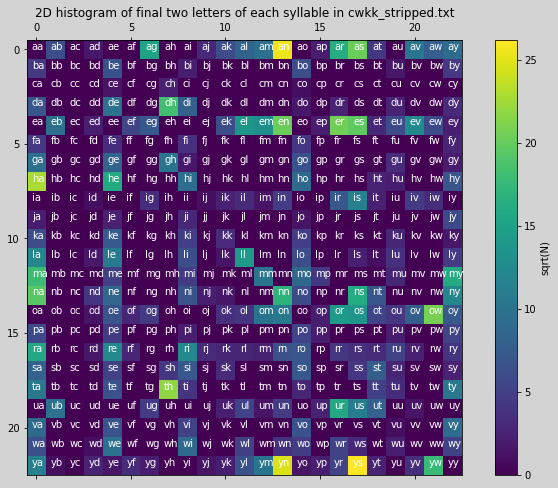

In [64]:
fig = plt.figure(figsize=[12,8], facecolor='lightgray')
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of final two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")